In [1]:
import numpy as np  
import statsmodels.api as sm  
import pandas as pd  
# 创建一些模拟数据  
np.random.seed(0)  
X = np.random.rand(100, 3)  # 100个样本，每个样本有3个特征  
y = X[:, 0] + 2 * X[:, 1] + np.random.rand(100)  # 因变量由前两个特征线性生成，并加入一些随机噪声  
# 将数据转换为Pandas DataFrame格式  
df = pd.DataFrame(X)  
df['y'] = y   
# 使用statsmodels进行线性回归  
X = sm.add_constant(df[df.columns[:-1]])  # 添加常数项作为截距项  
model = sm.OLS(df['y'], X)  
results = model.fit()  
# 输出回归结果  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     182.8
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.48e-39
Time:                        10:28:08   Log-Likelihood:                -15.114
No. Observations:                 100   AIC:                             38.23
Df Residuals:                      96   BIC:                             48.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5033      0.090      5.598      0.0

In [2]:
import numpy as np  
import statsmodels.formula.api as sm  
import pandas as pd    
# 创建一些模拟数据  
np.random.seed(0)  
x = np.random.rand(100, 3)  # 100个样本，每个样本有3个特征  
y = x[:, 0] + 2 * x[:, 1] + np.random.rand(100)  # 因变量由前两个特征线性生成，并加入一些随机噪声    
# 使用statsmodels进行线性回归  
model = sm.ols(formula='y ~ x', data=df)  
results = model.fit()  
# 输出回归结果  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     182.8
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.48e-39
Time:                        10:28:23   Log-Likelihood:                -15.114
No. Observations:                 100   AIC:                             38.23
Df Residuals:                      96   BIC:                             48.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5033      0.090      5.598      0.0

In [3]:
import numpy as np  
import statsmodels.api as sm  
x = np.random.rand(100, 3)  # 100个样本，每个样本有3个特征  
y = x[:, 0] + 2 * x[:, 1] + 3 * x[:, 2] + np.random.rand(100)  # 因变量由前两个特征线性生成，并加入一些随机噪声
# LASSO回归  
lasso = sm.OLS(y, x).fit_regularized(alpha=0.1, L1_wt=1) # L1_wt为0进行岭回归，1则进行LASSO回归  
print("LASSO Coefficients: ", lasso.params)
# 岭回归（这里不需要额外指定，因为默认是L2正则化）  
ridge = sm.OLS(y, x).fit_regularized(alpha=0.1, L1_wt=0)  
print("Ridge Coefficients: ", ridge.params)

LASSO Coefficients:  [1.14441301 2.30856357 3.03448631]
Ridge Coefficients:  [1.55300846 2.10878906 2.42451772]


e:\anaconda\lib\site-packages\statsmodels\regression\quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


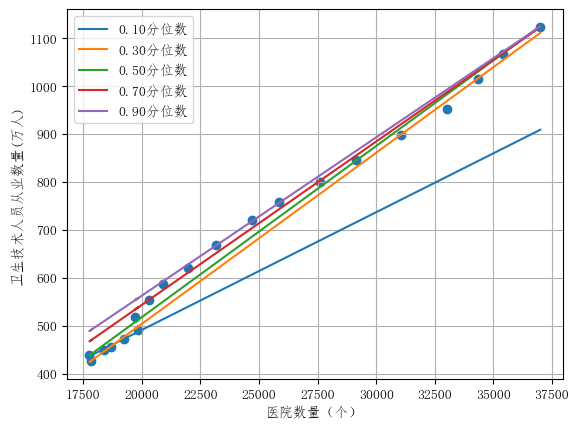

In [6]:
import numpy as np  
import matplotlib.pyplot as plt 
from statsmodels.formula.api import quantreg
import pandas as pd  
plt.rcParams['font.family']='FangSong'
plt.rcParams['axes.unicode_minus']=False
data = pd.read_csv('hospital_data.csv')  
plt.scatter(data['hospital'],data['people'])
x=data['hospital']  
# 分位数回归的参数估计  
for q in np.arange(0.1,1,0.2):
    mod = quantreg('people ~ hospital', data)  
    result = mod.fit(q=q)  # 拟合模型   
    # 输出模型摘要信息，包括系数、置信区间等  
    v=result.params
    y=v.Intercept+v.hospital*x
    plt.plot(x,y,label='%.2f分位数'%q)
plt.legend()
plt.xlabel("医院数量（个）")
plt.ylabel("卫生技术人员从业数量(万人)")
plt.grid()
plt.show()

观察到了显著的调节效应
引入交互项之前的R2= 0.792803235912938
引入交互项之后的R2= 0.8627784239589141
调节效应对R2系数提升度为 0.06997518804597613
中介效应： [-1.05030449e-17  4.53776128e-01]
总效应： [0.45377613 0.90755226]


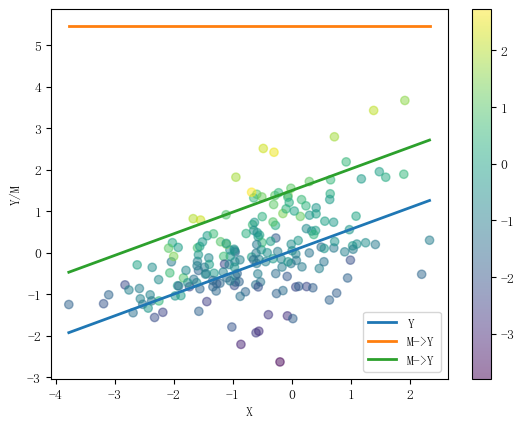

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
# 生成一些模拟数据  
X = np.random.normal(size=200)  
M = np.random.normal(size=200)  
Y = X + 2 * M + X * M + np.random.normal(size=200)  
# 创建调节效应模型
X1 = pd.DataFrame({'X':X,'M':M,'XM':X*M})
X1 = sm.add_constant(X1)
adjust = sm.OLS(Y,X1)
result1 = adjust.fit()
X2 = pd.DataFrame({'X':X,'M':M})
X2 = sm.add_constant(X2)
adjust = sm.OLS(Y,X2)
result2 = adjust.fit()
if result1.pvalues[3]<0.05:
    print("观察到了显著的调节效应")
    print("引入交互项之前的R2=",result2.rsquared)
    print("引入交互项之后的R2=",result1.rsquared)
    R=result1.rsquared-result2.rsquared
    print("调节效应对R2系数提升度为", R)
# 创建中介效应模型
# 标准化
X = sm.add_constant(X)
M = sm.add_constant(M)
X_scaled = (X - X.mean()) / X.std()
M_scaled = (M - M.mean()) / M.std()
Y_scaled = (Y - Y.mean()) / Y.std()
# 拟合回归模型
reg = sm.OLS(Y_scaled, X_scaled).fit()
# 拟合中介效应模型
med = sm.OLS(M_scaled, X_scaled).fit()
med_y = sm.OLS(Y_scaled, sm.add_constant(med.predict(X_scaled))).fit()
# 计算中介效应和总效应
indirect = med.params[1] * med_y.params[1]
direct = reg.params[1]
total = direct + indirect
print("中介效应：", indirect)
print("总效应：", total)
# 绘制路径图
fig, ax = plt.subplots()
sc = ax.scatter(X_scaled[:,1], Y_scaled, c=M_scaled[:,1], cmap='viridis', alpha=0.5)
plt.colorbar(sc)
fit_x = np.linspace(X_scaled[:,1].min(), X_scaled[:,1].max(), 100).reshape(-1,1)
fit_M = np.array([0.5] * len(fit_x)).reshape(-1,1)
fit_X = sm.add_constant(fit_x)
fit_M = sm.add_constant(fit_M)
fit_X_scaled = (fit_X - X.mean()) / X.std()
fit_M_scaled = (fit_M - M.mean()) / M.std()
fit_Y_pred = reg.predict(fit_X_scaled)
med_Y_pred = med_y.params[0] + med_y.params[1] * med.predict(fit_X_scaled)
ax.plot(fit_x, fit_Y_pred, label='Y', linewidth=2)
ax.plot(fit_x, med_Y_pred, label='M->Y', linewidth=2)
ax.legend()
plt.xlabel('X')
plt.ylabel('Y/M')
plt.show()

In [9]:
from semopy import Model
from semopy.examples import holzinger39
# 从 semopy 库加载 holzinger39 数据集
data = holzinger39.get_data()
# 定义模型
desc = '''
# 定义测量模型
y1 =~ x1 + x2 + x3
y2 =~ x4 + x5 + x6
y3 =~ x7 + x8 + x9

# 定义结构模型
y1 ~ y2 + y3
y2 ~~ y3
'''
# 使用 Model 类创建模型对象 mod
mod = Model(desc)
# 对模型进行拟合
mod.fit(data)
# 检验模型，输出每个参数的估计值、标准误等统计信息
estimates = mod.inspect()
print(estimates)

   lval  op rval  Estimate  Std. Err    z-value   p-value
0    y1   ~   y2  0.321527  0.067313   4.776602  0.000002
1    y1   ~   y3  0.537872  0.129582   4.150826  0.000033
2    x1   ~   y1  1.000000         -          -         -
3    x2   ~   y1  0.553606  0.099671   5.554318       0.0
4    x3   ~   y1  0.729309  0.109115   6.683854       0.0
5    x4   ~   y2  1.000000         -          -         -
6    x5   ~   y2  1.113106  0.065429  17.012339       0.0
7    x6   ~   y2  0.926111  0.055454  16.700597       0.0
8    x7   ~   y3  1.000000         -          -         -
9    x8   ~   y3  1.180314  0.165065   7.150608       0.0
10   x9   ~   y3  1.081410  0.151173   7.153469       0.0
11   y2  ~~   y3  0.173360  0.049306   3.515991  0.000438
12   y2  ~~   y2  0.979415  0.112101   8.736882       0.0
13   y1  ~~   y1  0.537124  0.117209   4.582637  0.000005
14   y3  ~~   y3  0.383711  0.086208   4.450974  0.000009
15   x1  ~~   x1  0.549036  0.113616   4.832405  0.000001
16   x6  ~~   

In [10]:
import numpy as np  
import statsmodels.api as sm  
from statsmodels.tsa.stattools import grangercausalitytests  
  
# 生成一些示例数据  
np.random.seed(12345)  
n = 100  
X = np.random.normal(size=(n, 2))  
  
# 添加一些时间趋势  
X[:, 0] = np.cumsum(X[:, 0])  
X[:, 1] = np.cumsum(X[:, 1]) + np.cumsum(X[:, 0])  
  
# 格兰杰因果检验  
results = grangercausalitytests(X, maxlag=2)  
print("--------------------------------")  
print(f"Variable 1 Granger causes Variable 2:")  
print(results[1][0]['ssr_ftest'][1])  # F-statistic  
print(results[1][0]['ssr_ftest'][0])  # p-value  
print("--------------------------------")
print(f"Variable 2 Granger causes Variable 1:")  
print(results[2][0]['ssr_ftest'][1])  # F-statistic  
print(results[2][0]['ssr_ftest'][0])  # p-value  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0111  , p=0.9162  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.0115  , p=0.9146  , df=1
likelihood ratio test: chi2=0.0115  , p=0.9147  , df=1
parameter F test:         F=0.0111  , p=0.9162  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8737  , p=0.4208  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=1.8413  , p=0.3983  , df=2
likelihood ratio test: chi2=1.8242  , p=0.4017  , df=2
parameter F test:         F=0.8737  , p=0.4208  , df_denom=93, df_num=2
--------------------------------
Variable 1 Granger causes Variable 2:
0.9161670277102283
0.011138829187929725
--------------------------------
Variable 2 Granger causes Variable 1:
0.4208055084676672
0.8736910565604834


In [11]:
import numpy as np  
import statsmodels.api as sm   
# 创建一些示例数据  
n = 1000  
X = np.random.normal(size=n)  
Y = 3 * X + np.random.normal(size=n)  # 假设Y是X的线性函数，并加入一些噪音  
# 定义断点  
cutoff = 0.5  
X_cut = X[X > cutoff]  
X_not_cut = X[X <= cutoff]  
Y_cut = Y[X > cutoff]  
Y_not_cut = Y[X <= cutoff]  
# 拟合线性回归模型  
X_cut_model = sm.add_constant(X_cut)  # 添加常数项  
model = sm.OLS(Y_cut, X_cut_model)  
results = model.fit()    
# 输出结果  
print("Coefficients: ", results.params)  # 输出系数，即因果效应的大小和方向  
print("P-value: ", results.pvalues[0])  # 输出p值，用于检验系数的显著性  
# 进行假设检验，以检验断点是否显著影响Y的值  
p_value = results.pvalues[0]  # p值用于检验断点是否存在显著影响  
if p_value < 0.05:  # 如果p值小于0.05，我们拒绝原假设，接受对立假设，认为存在因果关系  
    print(f"存在显著因果关系")  
else:  # 如果p值大于或等于0.05，我们不能拒绝原假设，认为不存在因果关系或证据不足  
    print(f"不存在显著因果关系")

Coefficients:  [0.06037695 3.02696511]
P-value:  0.6711531326773922
不存在显著因果关系
